# 🎓 Handwritten Digit Recognition using Softmax Regression

📝 **Overview**

This project demonstrates a classic machine learning problem: **classifying handwritten digits**. Using the famous **MNIST dataset**, we build and train a **Softmax Regression** model (a multiclass logistic regression) to recognize digits from 0 to 9. This serves as an excellent introduction to multiclass classification and the fundamentals of image recognition.




📊 **Dataset**

The project uses the **MNIST (Modified National Institute of Standards and Technology)** dataset. It is a benchmark dataset in the machine learning community and consists of:

**70,000** grayscale images of handwritten digits.

Each image is **28x28 pixels**.

The dataset is pre-split into a standard training set of **60,000 images** and a test set of **10,000 images**.


🧠 **Model: Softmax Regression**

We use Softmax Regression as our classification model. It's a generalization of logistic regression that can handle problems with more than two classes.

The model calculates a probability for each class (0 through 9) for a given input image. The class with the highest probability is chosen as the final prediction. This is implemented using **scikit-learn's LogisticRegression classifier** with the **multi_class='multinomial'** parameter.

In [1]:
import ssl
# For data loading and manipulation
from sklearn.datasets import fetch_openml
import numpy as np

# For building and training the model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# For evaluation and visualization
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [2]:
try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

In [3]:
# Load data from https://www.openml.org/d/554
# X contains the image data (features), y contains the labels (target digit)
print("Fetching MNIST dataset...")
mnist = fetch_openml('mnist_784', version=1, as_frame=False, parser='auto')
X, y = mnist.data, mnist.target
print("Dataset loaded successfully.")

Fetching MNIST dataset...
Dataset loaded successfully.


In [4]:
print(X)

print(type(X))
print(X.shape)  # (70000, 784)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
<class 'numpy.ndarray'>
(70000, 784)


In [5]:
print(y)
print(type(y))
print(y.shape)  # (70000,)

['5' '0' '4' ... '4' '5' '6']
<class 'numpy.ndarray'>
(70000,)


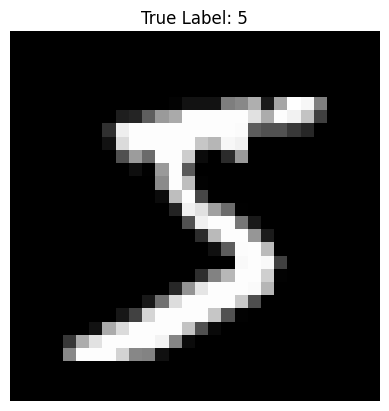

In [6]:
# X has 70,000 rows (one for each image) and 784 columns (28x28 pixels flattened)
# y has 70,000 labels corresponding to each image

# Let's visualize a single digit
some_digit_index = 0
some_digit_image = X[some_digit_index].reshape(28, 28)
true_label = y[some_digit_index]

plt.imshow(some_digit_image, cmap='gray')
plt.title(f"True Label: {true_label}")
plt.axis("off")
plt.show()

In [ ]:
# The output labels are strings and need to be converted to integers.
y = y.astype(np.int8)
# 1. Split the data (60,000 for training, 10,000 for testing)
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

# 2. Scale the pixel values to be between 0 and 1
# This improves performance for many algorithms
X_train_scaled = X_train / 255.0
X_test_scaled = X_test / 255.0

print("Data has been split and scaled.")
print("Training set size:", len(X_train_scaled))
print("Test set size:", len(X_test_scaled))

print(f"X_train_scaled[0]:\n {X_train_scaled[0]}")

Data has been split and scaled.
Training set size: 60000
Test set size: 10000
X_train_scaled[0]:
 [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.   

In [8]:
# Create the Softmax Regression model
# The 'lbfgs' solver is a good choice for this problem
softmax_reg = LogisticRegression(solver='lbfgs', max_iter=1000, random_state=42)

# Train the model on the scaled training data
print("Training the model... (This may take a moment)")
softmax_reg.fit(X_train_scaled, y_train)
print("Training complete! ✅")

Training the model... (This may take a moment)


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_linear_loss.py:203: RuntimeWarning: divide by zero encountered in matmul
  raw_prediction = X @ weights.T + intercept  # ndarray, likely C-contiguous
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_linear_loss.py:203: RuntimeWarning: overflow encountered in matmul
  raw_prediction = X @ weights.T + intercept  # ndarray, likely C-contiguous
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_linear_loss.py:203: RuntimeWarning: invalid value encountered in matmul
  raw_prediction = X @ weights.T + intercept  # ndarray, likely C-contiguous
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_linear_loss.py:336: RuntimeWarning: divide by zero encountered in matmul
  grad[:, :n_features] = grad_pointwise.T @ X + l2_reg_strength * weights
/L

Training complete! ✅


Model Accuracy on Test Set: 0.9262

Displaying Confusion Matrix...
ax: Axes(0.125,0.11;0.775x0.77)


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: in

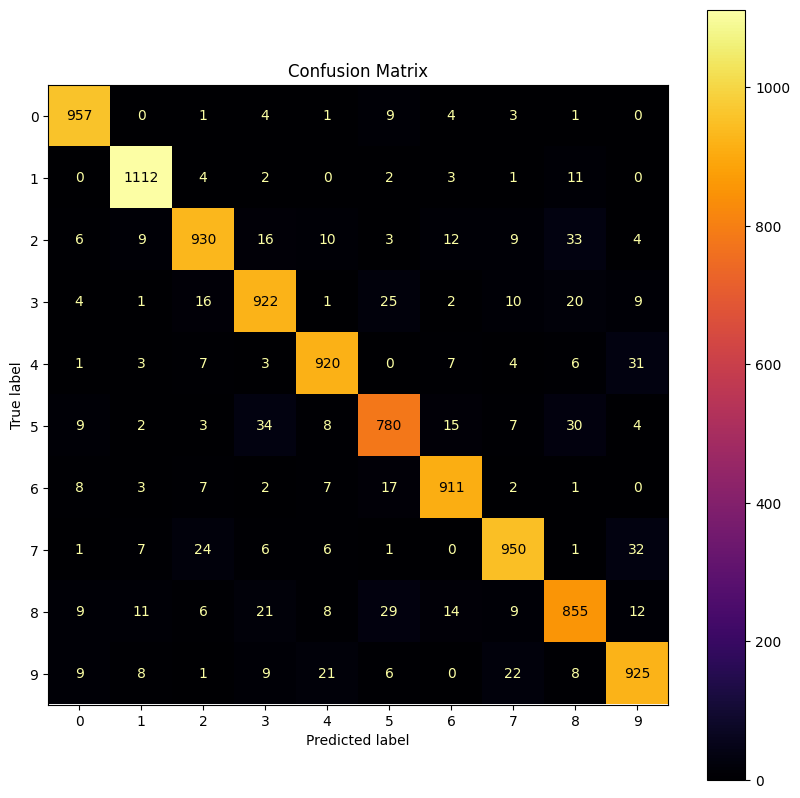

In [9]:
# Make predictions on the test set
y_pred = softmax_reg.predict(X_test_scaled)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy on Test Set: {accuracy:.4f}")

# Display the confusion matrix to see where the model made mistakes
print("\nDisplaying Confusion Matrix...")
fig, ax = plt.subplots(figsize=(10, 10))
print("ax:",ax)
ConfusionMatrixDisplay.from_estimator(softmax_reg, X_test_scaled, y_test, ax=ax, cmap='inferno')
plt.title("Confusion Matrix")
plt.show()

In [10]:
# Pick a random image from the test set
# '195' is an exmple for wrong prediction
some_index = 2026
some_digit = X_test[some_index]
some_digit_label = y_test[some_index]
print(f"True label for the selected image: {some_digit_label}")

# Remember to scale the single image just like the training data
some_digit_scaled = some_digit / 255.0

#print(some_digit_scaled.reshape(1, -1))

# The model expects a 2D array, so we reshape our 1D image array
prediction = softmax_reg.predict(some_digit_scaled.reshape(1, -1))
print(f"Predicted label for the selected image: {prediction[0]}")

True label for the selected image: 6
Predicted label for the selected image: 6


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


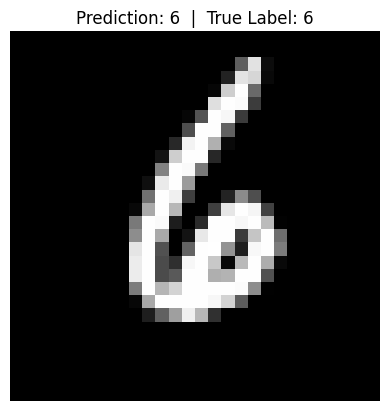

In [11]:
# Let's see the result visually!
original_image = some_digit.reshape(28, 28)
plt.imshow(original_image, cmap="gray")
plt.title(f"Prediction: {prediction[0]}  |  True Label: {some_digit_label}")
plt.axis("off")
plt.show()